# Predicting Water Levels for the Auser Aquifer

## Importing libraries and dataset

In [1]:
import pandas as pd 
from datetime import datetime
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aus = pd.read_csv('Aquifer_Auser.csv')

## Performing the same initial transformations as the first notebook

In [3]:
aus['Date'] = pd.to_datetime(aus['Date'], format='%d/%m/%Y')

In [4]:
abs_cols = ['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG', 'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
           'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL']
# absolute values can be taken from the above columns as clarified by competition host in a discussion thread on kaggle

In [5]:
for col in abs_cols:
    aus[col] = abs(aus[col])

## Further EDA on the features by month and year

In [6]:
aus['month'] = aus['Date'].dt.month
aus['year'] = aus['Date'].dt.year

In [7]:
def lineplot(df, col, title):
    plt.figure(figsize=(15,10))
    plt.grid(b=True)
    plt.title(title)
    sort = df.sort_values('Date', axis=0, ascending=True)
    sns.lineplot(data = sort, x = 'month', y = col, hue = 'year', palette = 'viridis', hue_norm = (1998, 2020));

<ipython-input-7-ee45c05b0506>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,10))


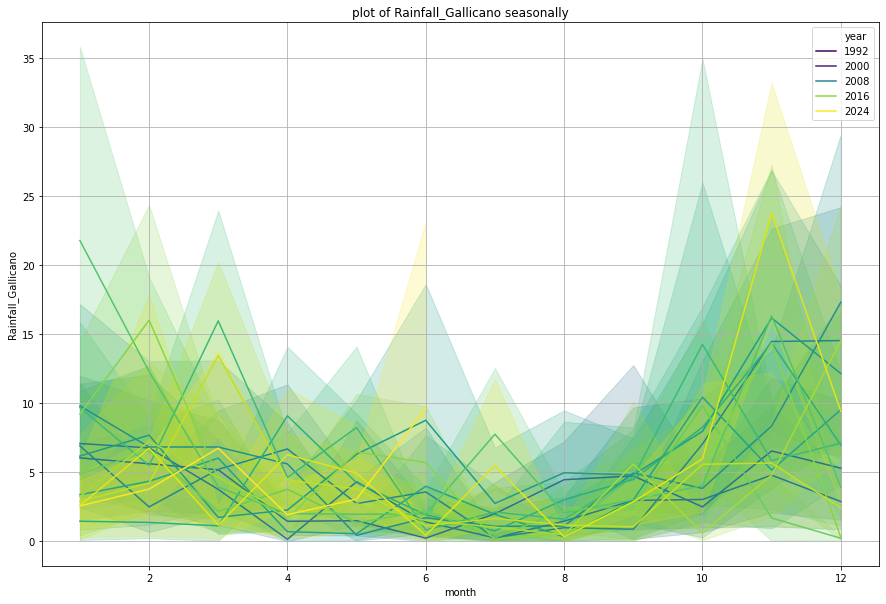

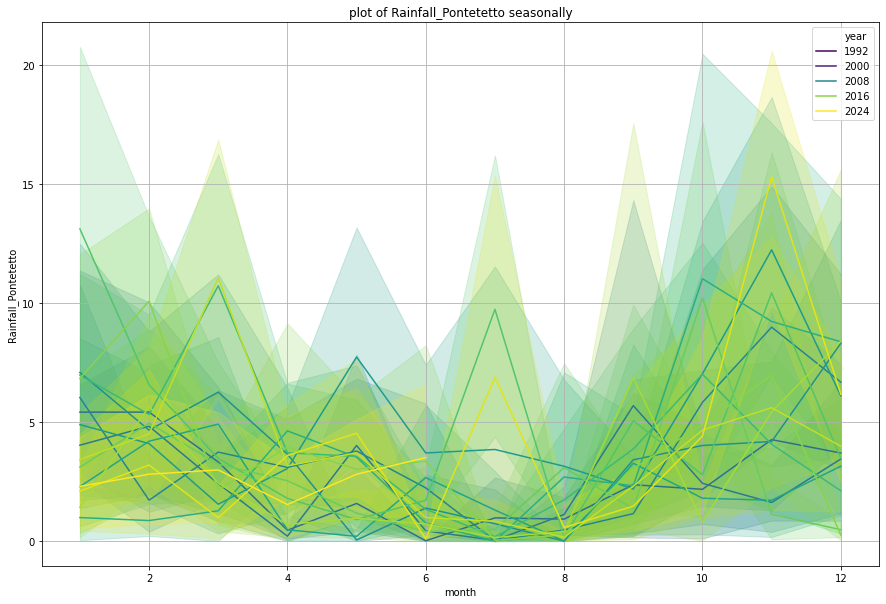

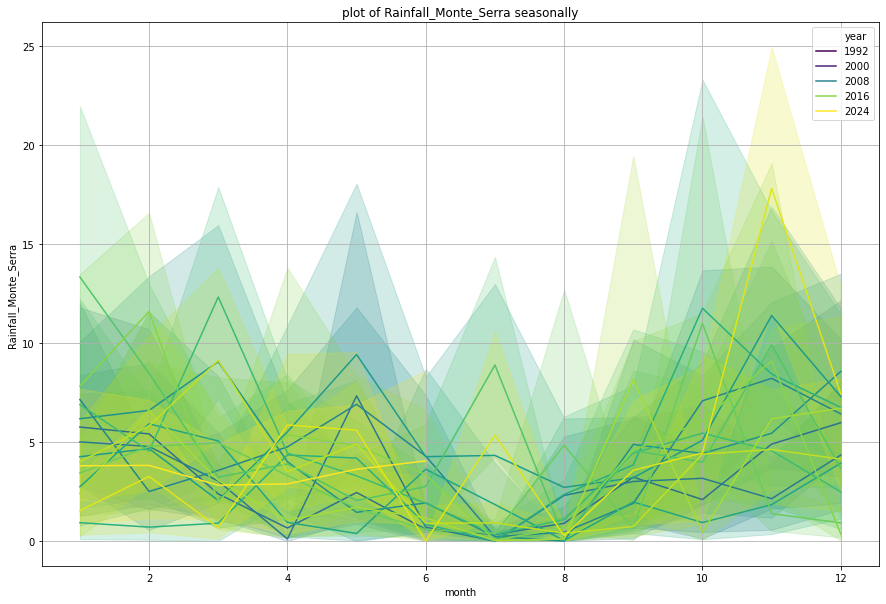

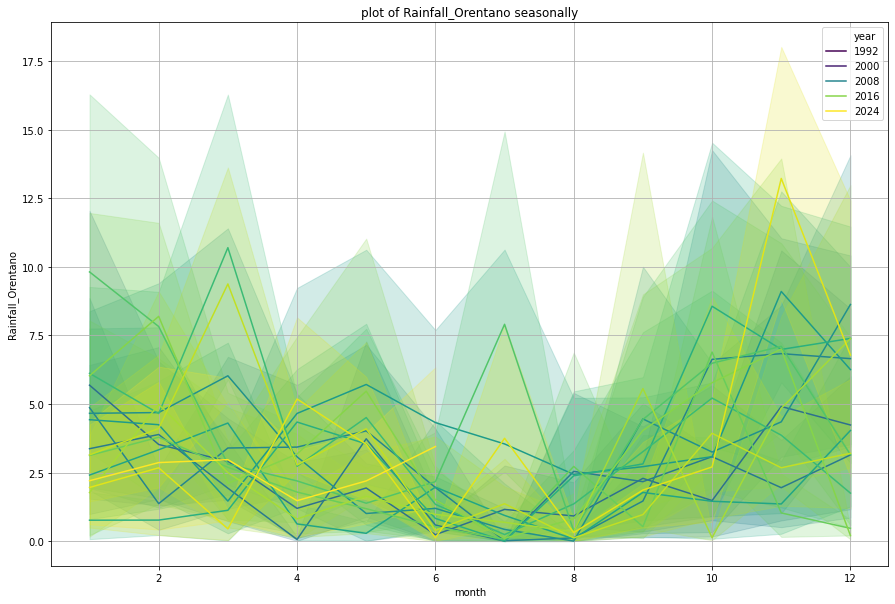

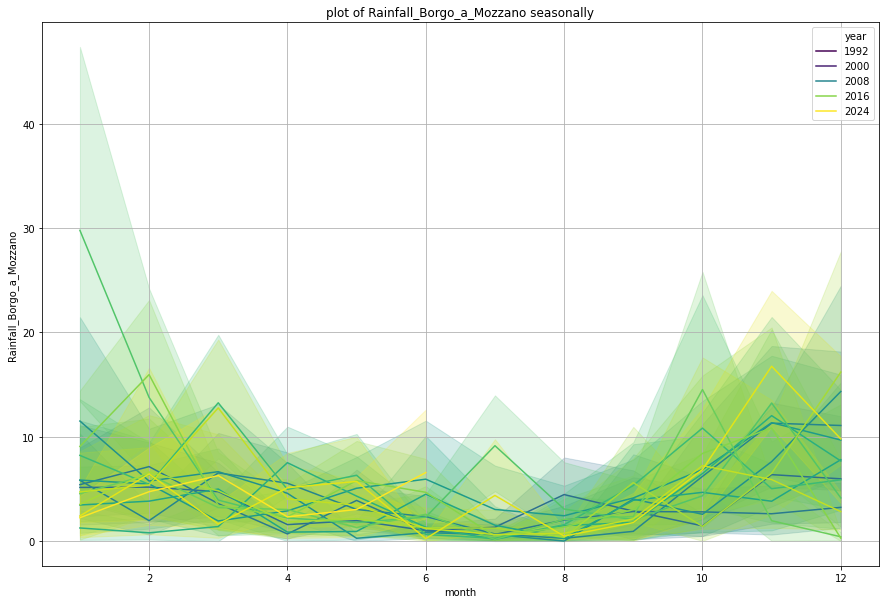

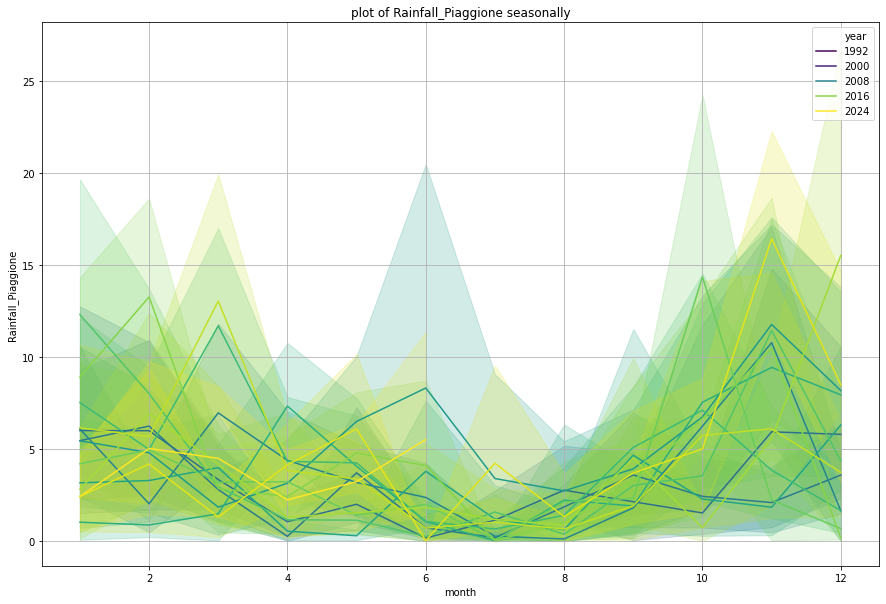

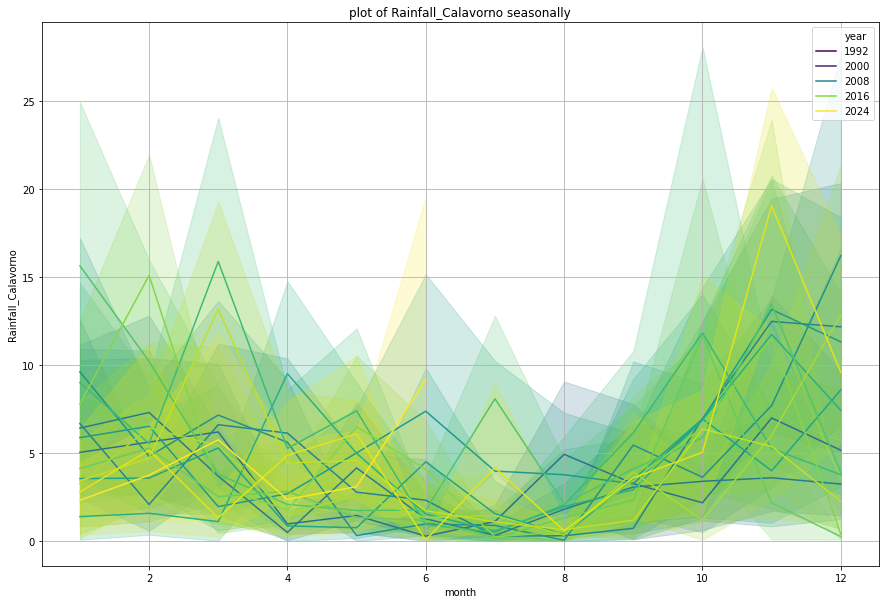

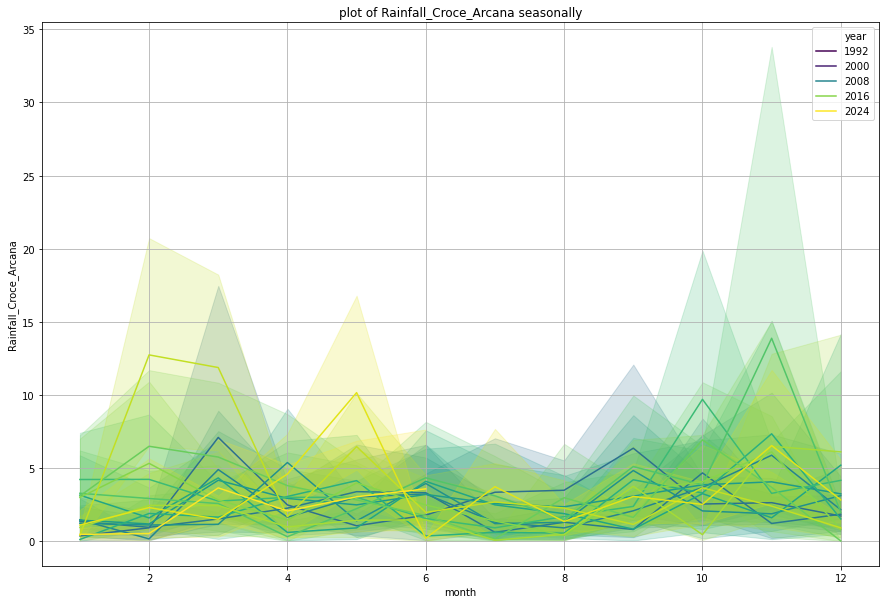

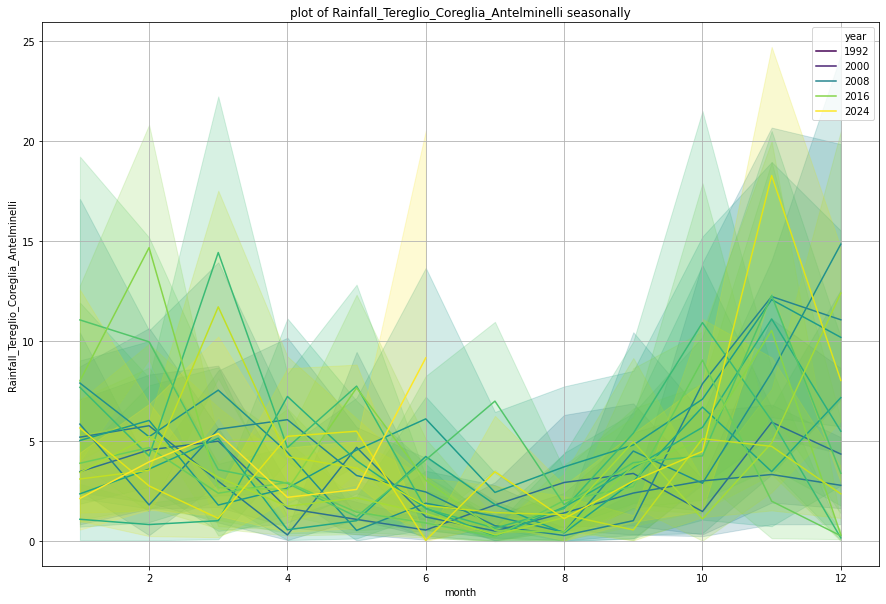

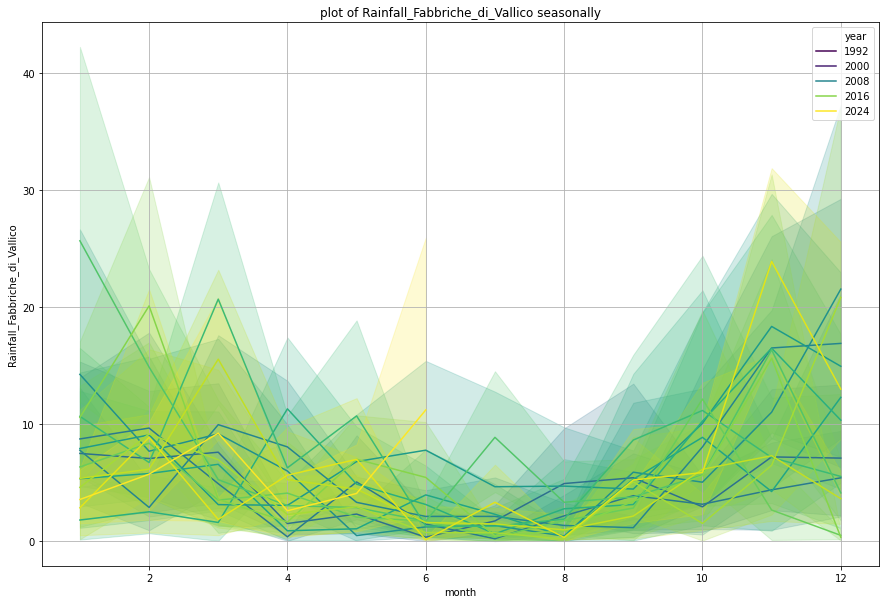

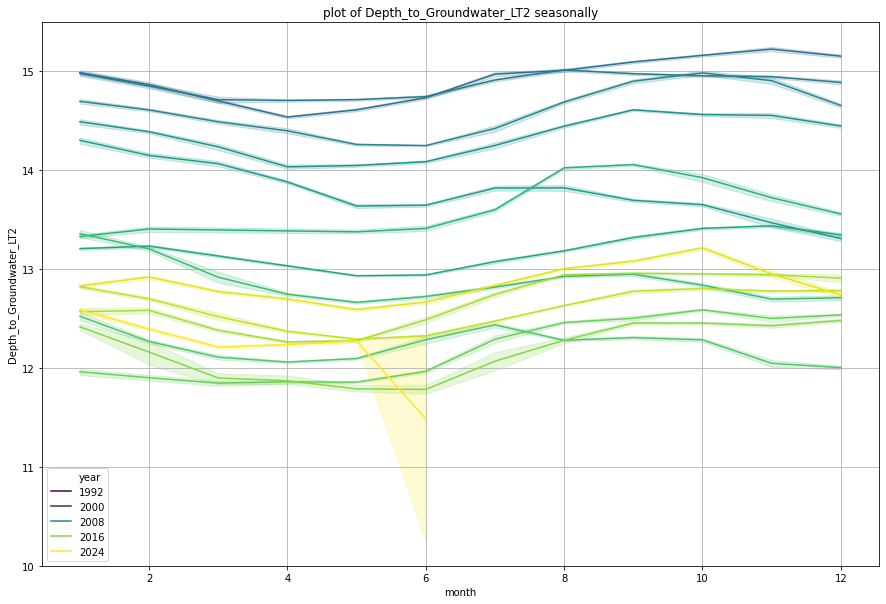

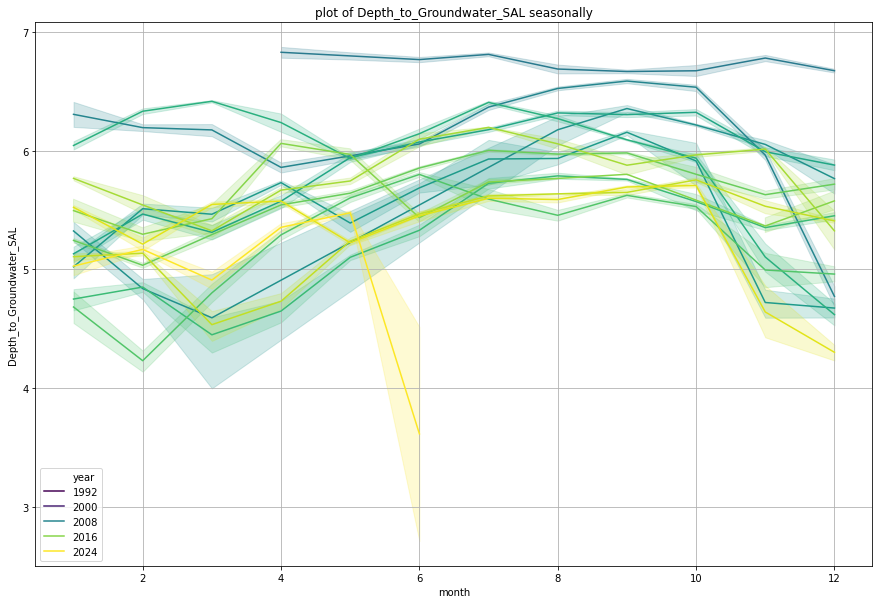

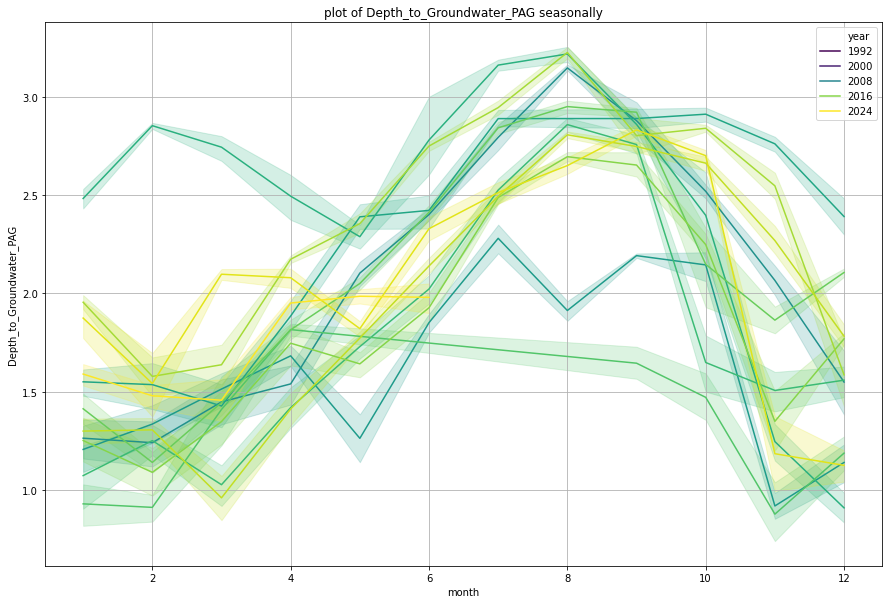

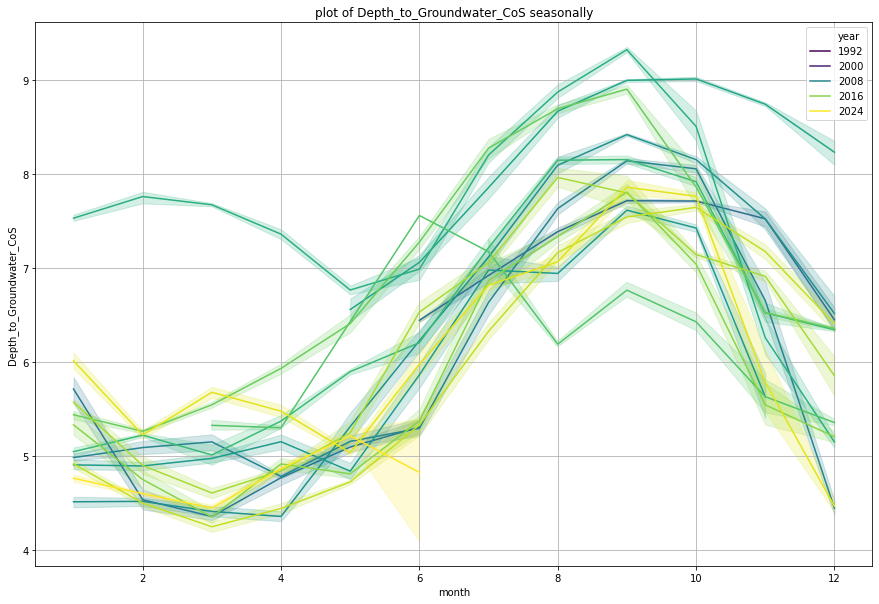

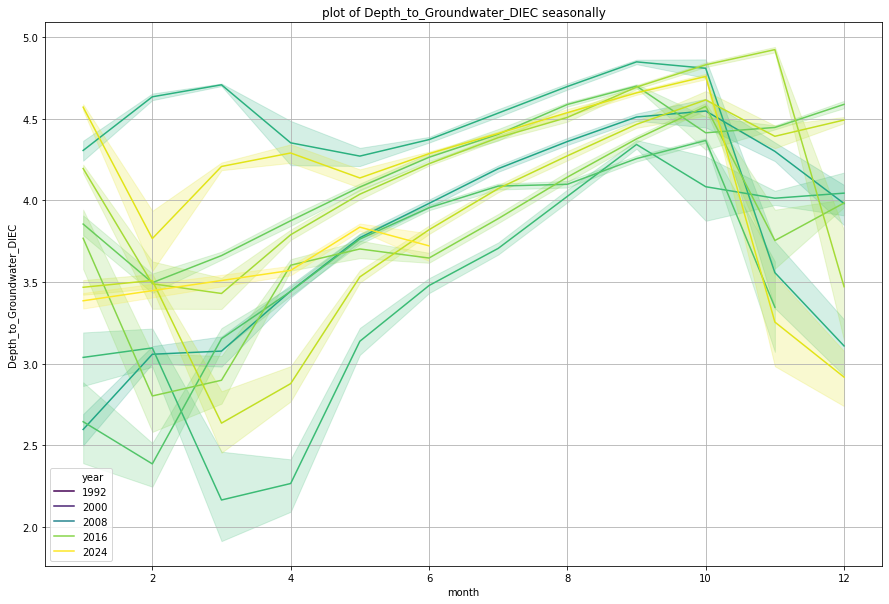

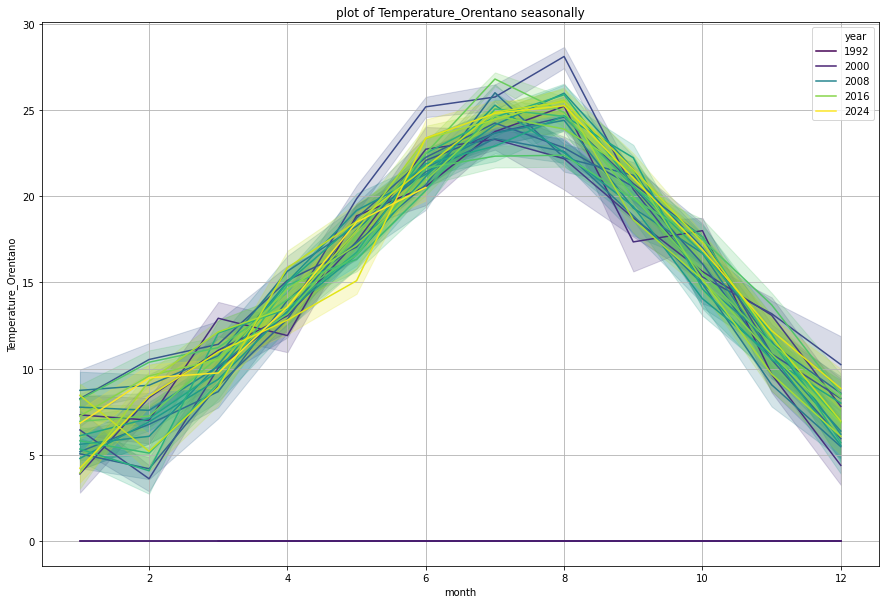

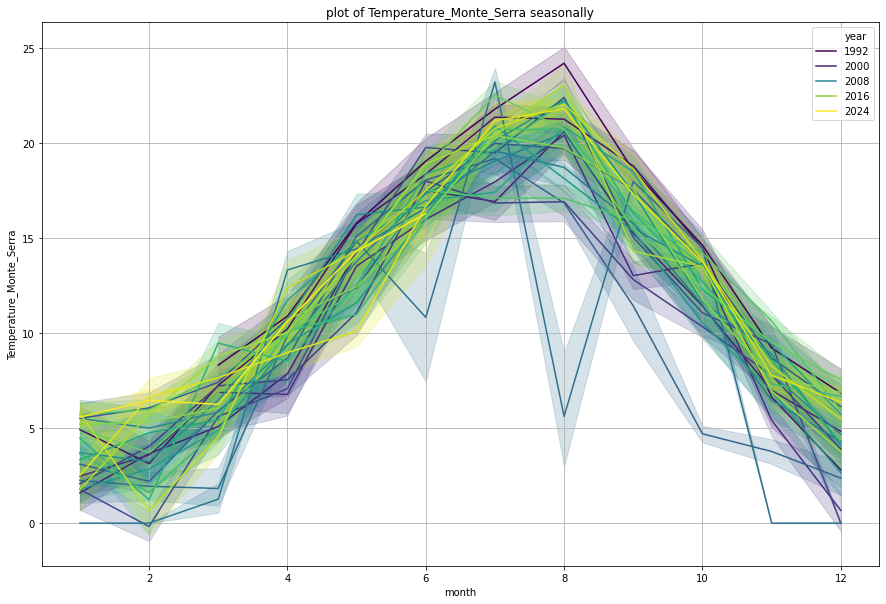

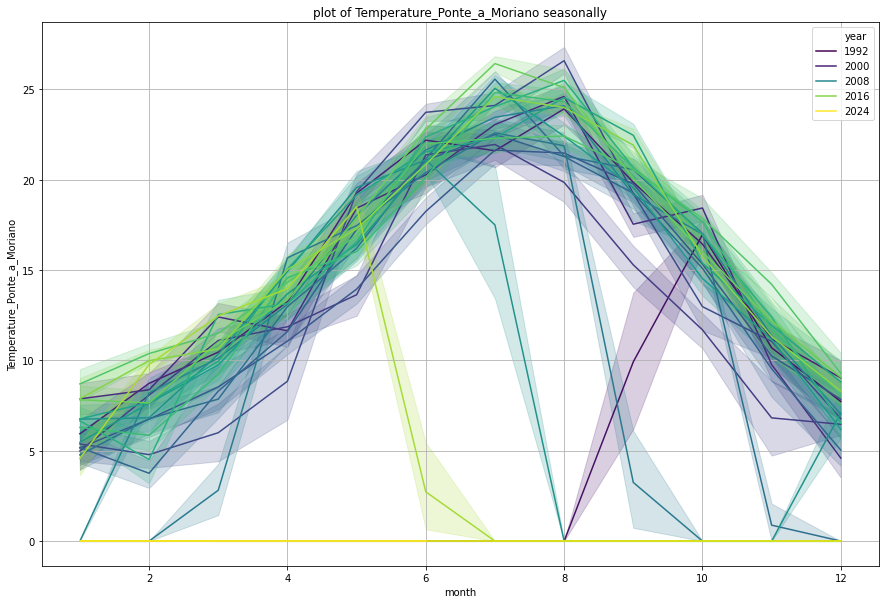

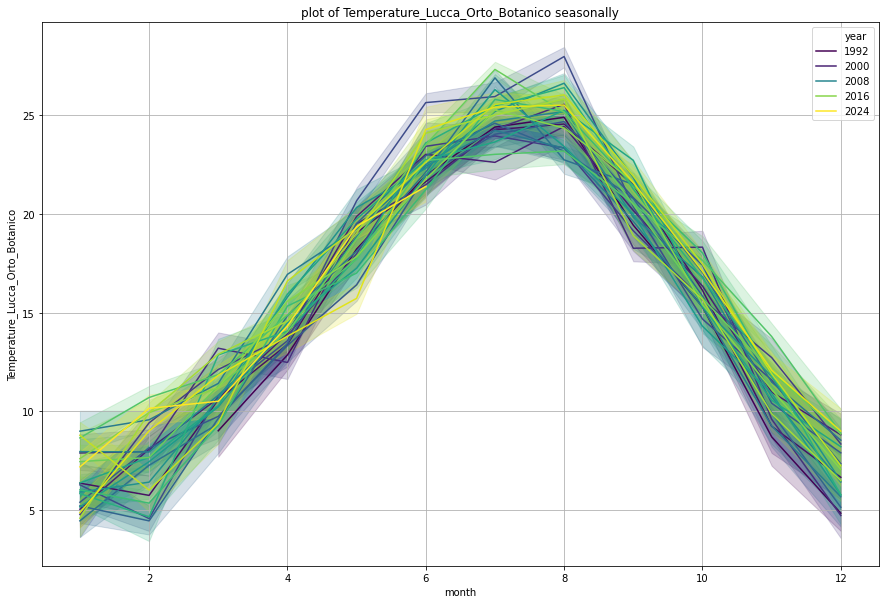

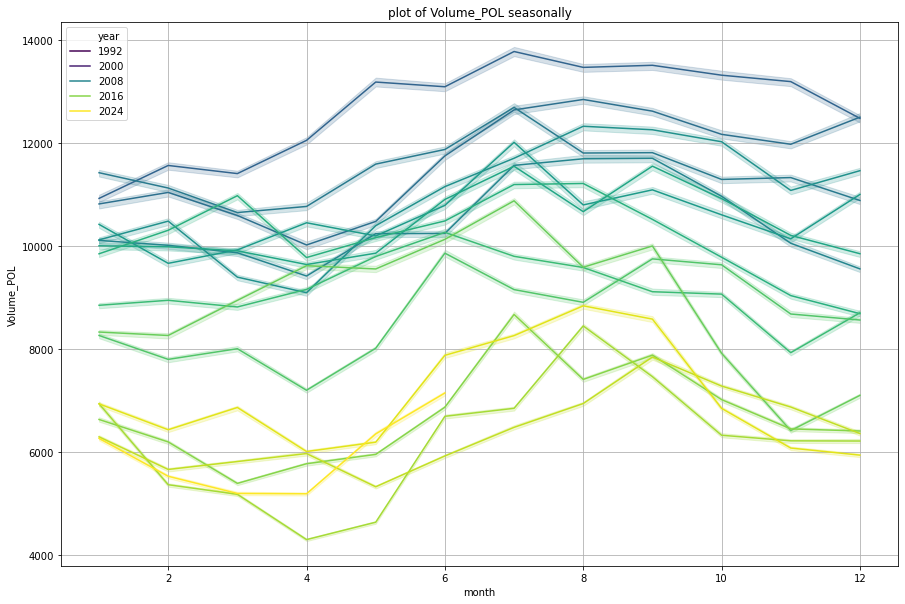

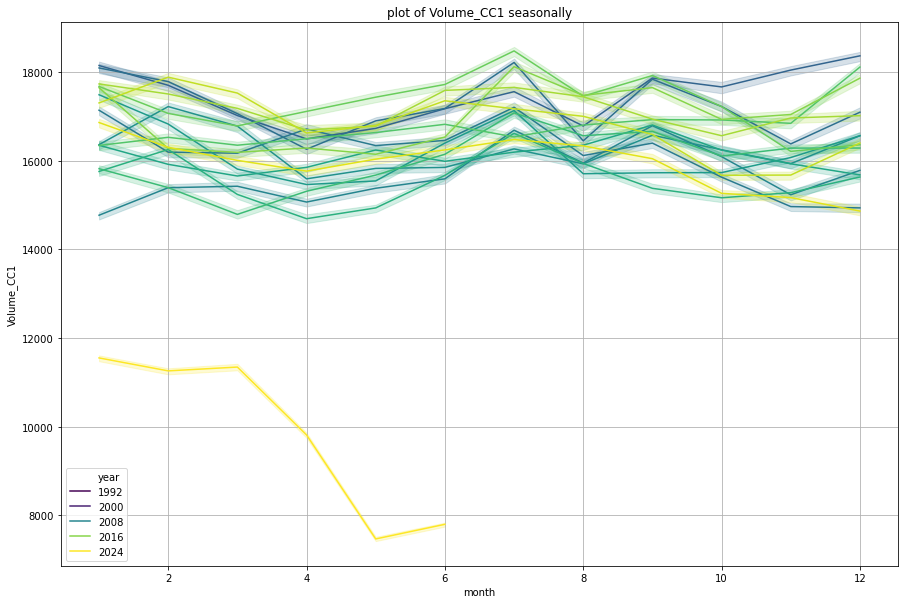

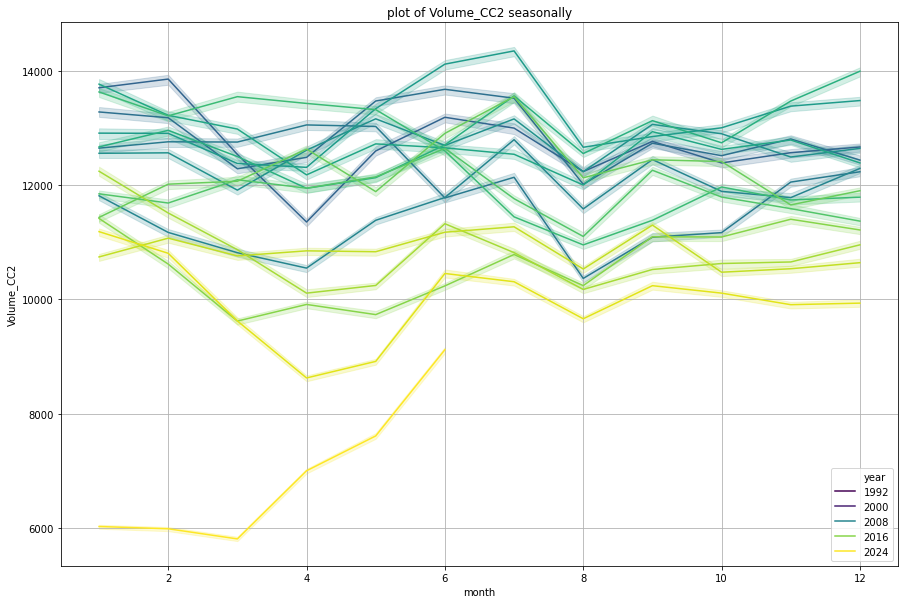

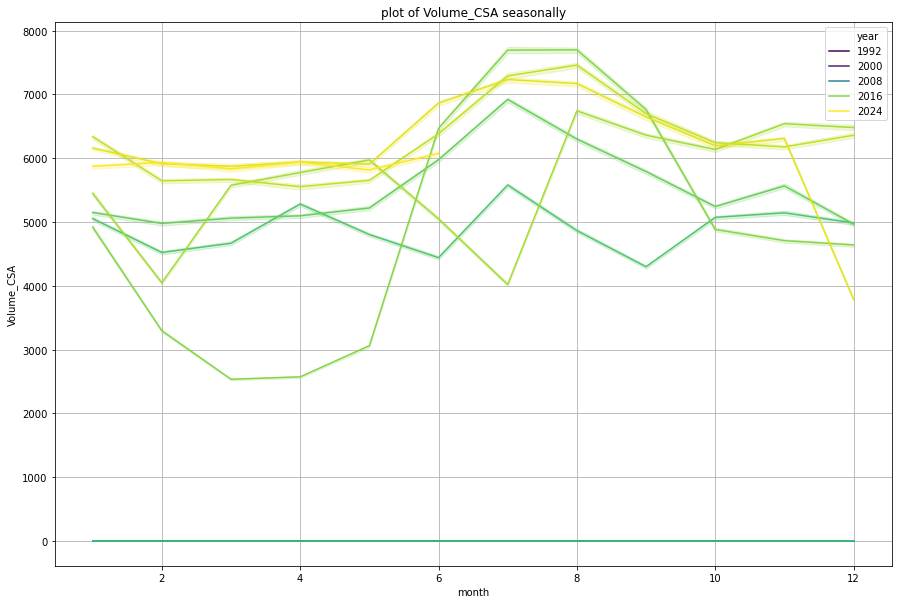

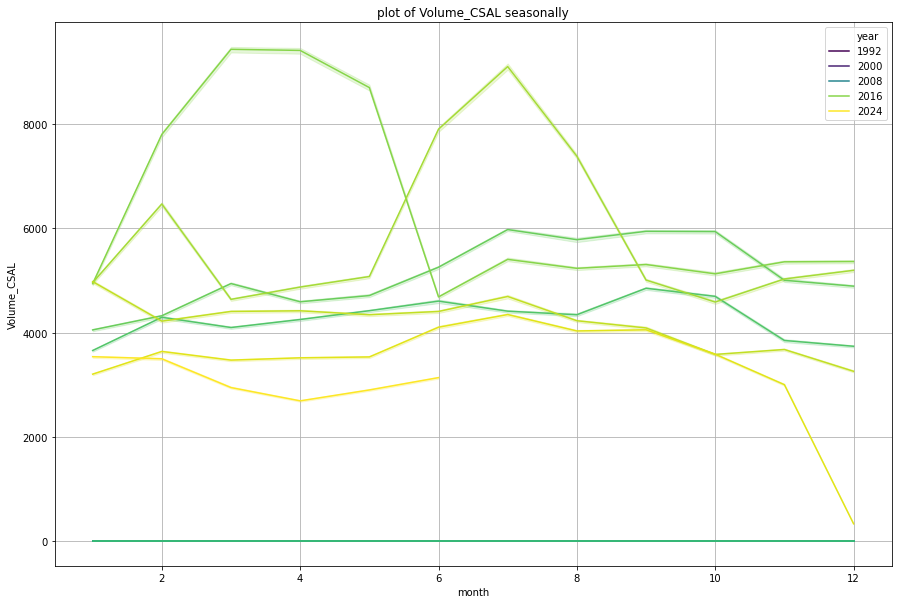

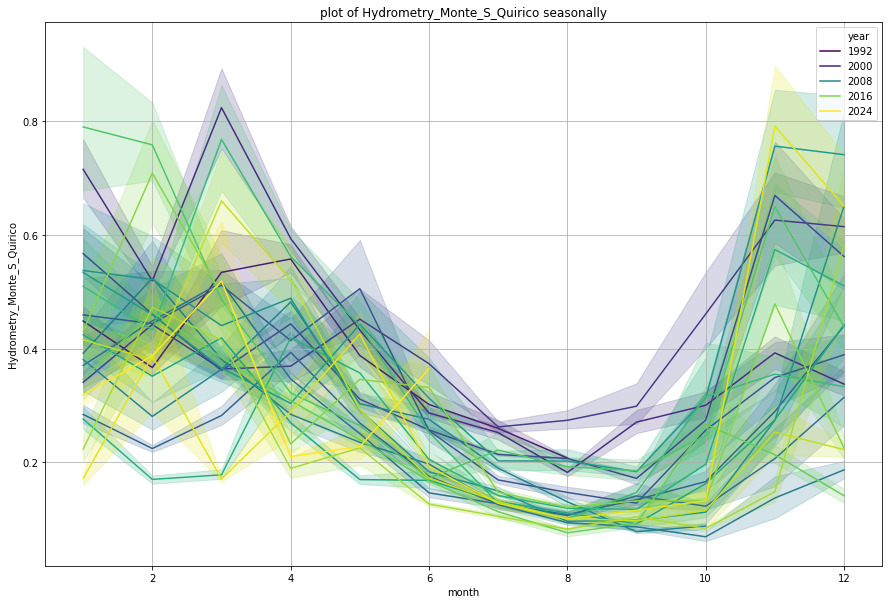

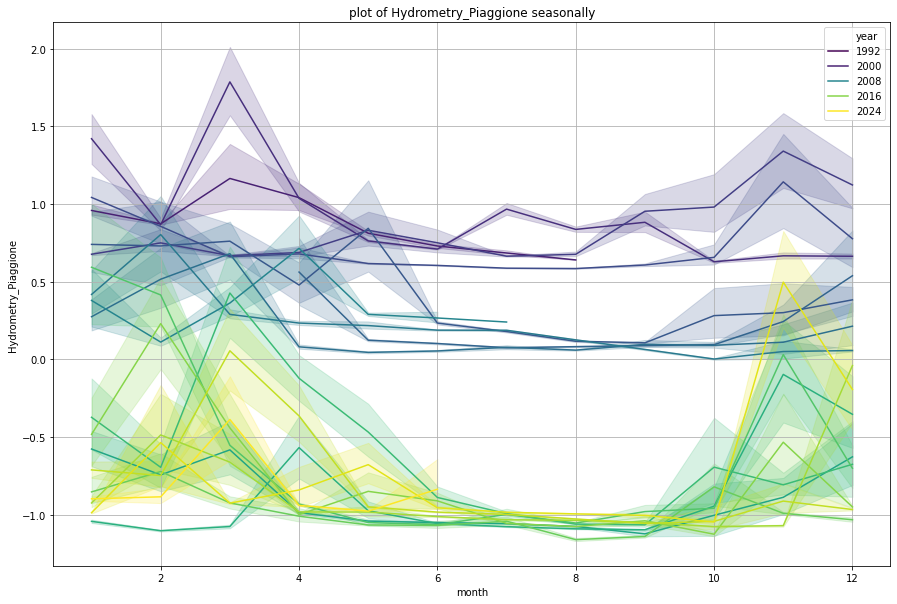

In [8]:
for col in aus.drop(['Date', 'month', 'year'], axis = 1).columns:
    lineplot(aus, col, ('plot of ' + str(col) + ' seasonally'))